# <center>Digital Image Processing - Problem Set 5</center>

### Student Names: 
* Karolay Ardila Salazar
* Julián Sibaja García
* Andrés Simancas Mateus

### Definitions

In [1]:
'''This is a definition script, so we do not have to rewrite code'''

import numpy as np
import os
import cv2
import matplotlib.pyplot as mplt
import random
import json


# set matplotlib to print inline (Jupyter)
%matplotlib inline

# path prefix
pth = '../data/'

# files to be used as samples
# list *files* holds the names of the test images
files = sorted(os.listdir(pth))
print files

# Usefull function
def rg(img_path):
    return cv2.imread(pth+img_path, cv2.IMREAD_GRAYSCALE)

['Fall-Nature-Background-Pictures.jpg', 'Fig6.21(b).jpg', 'Woman.bmp', 'blown_ic.png', 'blurry_moon.png', 'bottles.png', 'building.jpg', 'cameraman.png', 'cameraman_new.png', 'check.png', 'chest.jpg', 'ckt_board_saltpep_prob_pt05.png', 'connected.jpg', 'contact_lens_original.png', 'crosses.png', 'darkPollen.jpg', 'dark_fountain.jpg', 'face.png', 'face.tif', 'fingerprint.jpg', 'flower.jpg', 'fruits.jpg', 'hiro.jpg', 'hubble-original.tif', 'hut.jpg', 'image_0001.jpg', 'image_0002.jpg', 'image_0003.jpg', 'image_0004.jpg', 'image_0005.jpg', 'image_0006.jpg', 'image_0007.jpg', 'image_0008.jpg', 'image_0009.jpg', 'image_0010.jpg', 'image_0011.jpg', 'image_0012.jpg', 'image_0013.jpg', 'image_0014.jpg', 'image_0015.jpg', 'image_0016.jpg', 'image_0017.jpg', 'image_0018.jpg', 'image_0019.jpg', 'image_0020.jpg', 'lena.jpg', 'lightPollen.jpg', 'lowContrastPollen.jpg', 'mms.jpg', 'moon.jpg', 'new_bottles.jpg', 'new_cameraman.png', 'new_chest.bmp', 'noisy_fingerprint.jpg', 'out.png', 'pollen.jpg', '

### Problem 1

Write a function that describes <i>each</i> object in a binary image using the Hu statistical moments. The Hu moments are invariant to rotation, scale and translation. These moments can be defined for <i>each</i> region in a binary image. The OpenCV function to compute these moments is <tt>cv2.HuMoments</tt>. Write down the equations that compute the seven Hu moments for a region.

[  3.23930241e-03   6.36157427e-06   1.51749354e-09   1.78455597e-09
   2.82827189e-18   4.47652555e-12   7.90600638e-19]


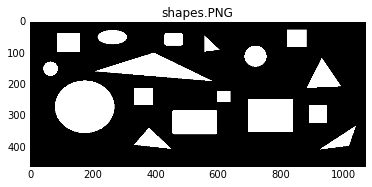

In [9]:
image = rg(files[-11])

def huMoments(img):
    ret,thresh = cv2.threshold(img, 127, 255, 0) # Saving image with threshold in "thresh"
    
    height, width = thresh.shape 
    mask = np.zeros((height + 2, width + 2), np.uint8)
    mask2 = np.zeros((height + 2, width + 2), np.uint8)
    k = 0 

    for i in range(height):
        for j in range(width):
            if(thresh[i,j] == 255): 
                k = k + 1
    Hu = cv2.HuMoments(cv2.moments(img)).flatten()
    print Hu

mplt.figure()
mplt.imshow(image, cmap='gray')
mplt.title(files[-11])

huMoments(image)

### Problem 2

Write a function that detects corners on an image using the Harris corner detection method. You can use the OpenCV built-in functions. Your function should output the $N$ detected corner locations in a $2 \times N$ matrix. Visualize your results by plotting the corners on top of the input image.  Apply your function to the binary image <tt> shapes.png</tt> and to the grayscale image <tt>face.tif</tt>.

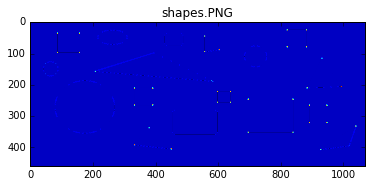

In [16]:
image = rg(files[-11])
gray = np.float32(image)

dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
#image[dst>0.01*dst.max()]=[0,0,255]

mplt.figure()
mplt.imshow(dst)
mplt.title(files[-11])


### Problem 3

A company that bottles a variety of industrial chemicals has heard
of your success solving imaging problems and hires you to design an approach
for detecting when bottles are not full. The bottles appear as shown below
as they move along a conveyor line past an automatic
filling and capping station. A bottle is considered imperfectly filled when the
level of the liquid is below the midway point between the bottom of the neck and
the shoulder of the bottle.The shoulder is defined as the region of the bottle
where the sides and slanted portion of the bottle intersect. The bottles are
moving, but the company has an imaging system equipped with an illumination
flash front end that effectively stops motion, so you will be given images that
look very close to the sample shown below.

<img src="../data/files/bottles.png" />

Propose a solution for detecting
bottles that are not filled properly. State clearly all assumptions that you
make and that are likely to impact the solution you propose. Implement your
solution and apply it to the images <tt>bottles.tif, new_bottles.jpg</tt> and <tt> three_bottles.jpg</tt>. Visualize the results
of your algorithm by highlighting with false colors
the regions that are detected as correctly
filled bottles and the regions that are detected as not properly filled bottles.

### Comentario
La idea es encontrar las botellas que no están llenas apropiadamente. No se requirió de comandos demasiado complejos de OpenCV, de hecho ninguno además de `threshold`, `filter2D` y `erode`. La idea se puede resumir como sigue:

* Encontrar el ancho promedio de las botellas, este ancho promedio es aproximadamente el mínimo valor posible de líquido en una botella correcta,
* Encontrar la altura en la imagen en la que ocurre por primera vez el ancho promedio (este va a ser el nivel límite de líquido)
* Encontrar la cantidad de botellas de la imagen,
* Encontrar los centros de estas botellas,
* Al nivel mínimo verificar qué botella tiene aire todavía e indexarla.

Para empezar se suaviza la imagen con un `filtro2D` y se umbraliza la misma para separar las botellas del fondo; este valor se almacena. Luego la idea es encontrar el número de botellas que hay y su ancho; para esto creamos una regla (un vector de ceros) que sumamos con cada fila de la imagen. Lo resultante de la operación es un vector con intervalos de ceros y unos (unos son regiones de las botellas), se miden las regiones de unos y el número de las mismas; la moda del número de regiones es el número de botellas que hay, la media de máximo de cada medición es el ancho de las botellas. Debido a que este ancho hallado es ciertamente menor que el ancho real, sirve como el ancho de la botella en el que ocurre la altura de líquido mínima.
Cabe notar que en la medición de las regiones hecha anteriormente se calcularon  los centros de las botellas (centros de cada región) y se estimó la altura mínima del líquido a través del ancho promedio.

Luego de esto se umbralizó la imagen inicial con el fin de obtener las regiones de aire únicamente (fue necesario hacer erosión para remover elementos pequeños). Esta imagen se evaluó en la fila de altura de agua mínima y se extrajeron las regiones de aire a esta altura; el centro de estas regiones se contrasto con el centro de las botellas para saber a qué botella pertenecían y de esta forma identificarlas.

Final decision. Bottles not correct are marked with 1s: 
[0, 0, 1, 0, 0]
Final decision. Bottles not correct are marked with 1s: 
[0, 1, 1, 1, 0]
Final decision. Bottles not correct are marked with 1s: 
[0, 1, 0, 0, 0]


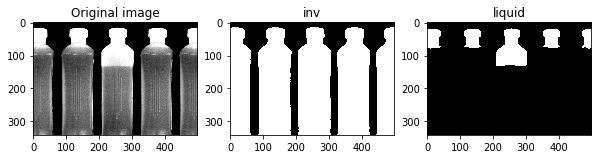

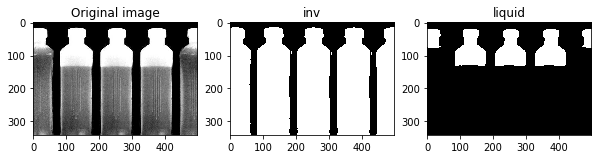

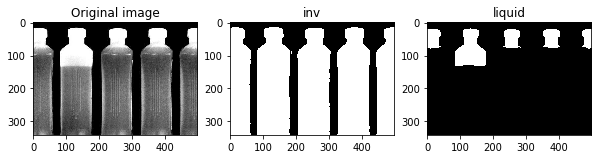

In [121]:
# Images to test
MIN_DIST = 30
LEVEL_OFFSET_INV = 10
LEVEL_OFFSET = 90
imgs = [files[i] for i in [5, -3, -20]]

# Bad bottle detector
def badBottleDetector(img):
    h, w = img.shape
    
    # Smooth
    kernel = np.ones((3,3),np.float32)/9
    simg = cv2.filter2D(img, -1, kernel)
    simg_c = simg.copy()
    
    _, simg_ct = cv2.threshold(simg_c, np.mean(simg_c)+LEVEL_OFFSET, 1, cv2.THRESH_BINARY)
    _, simg_cn = cv2.threshold(simg_c, LEVEL_OFFSET_INV, 1, cv2.THRESH_BINARY)
    kernel = np.ones((5,5), np.uint8)
    simg_ct = cv2.erode(simg_ct, kernel, iterations=1)
    
    bottles = list()
    sizes = list()
    indices = list()
    centers = list()
    for i in range(h):
        ruler = np.zeros([1, w]) + simg_cn[i: i+1]
        ruler = ruler[0]
        
        seed = 0
        break_points = list()
        for j in range(len(ruler)):
            if (ruler[j] != seed) or (j == len(ruler)-1 and ruler[j] == 1):
                break_points.append(j)
                seed = int(not seed)
        
        dist = list()
        center = list()
        for j in range(0, len(break_points)-1, 2):
            if break_points[j+1] - break_points[j] > MIN_DIST:
                dist.append(break_points[j+1] - break_points[j])
                center.append(int((break_points[j+1] + break_points[j])/2))
                
        if dist:
            bottles.append(len(dist))
            sizes.append(np.max(dist))
            indices.append(i)
            centers.append(center)
        
    counts = np.bincount(bottles)
    num_bottles = np.argmax(counts)
    base_size = int(np.mean(sizes))
    centers = [c for c in centers if len(c) == num_bottles]
    
    center = list()
    for i in range(num_bottles):
        bt = [c[i] for c in centers]
        center.append(int(np.mean(bt)))
    
    index = 0
    for i in range(len(sizes)):
        if sizes[i] > base_size:
            index = i
            break
    liquid_min_limit = indices[index]
    
    # Check which bottle has air at index liquid_min_limit
    ruler = np.zeros([1, w]) + simg_ct[liquid_min_limit: liquid_min_limit+1]
    ruler = ruler[0]
        
    seed = 0
    break_points = list()
    for j in range(len(ruler)):
        if (ruler[j] != seed) or (j == len(ruler)-1 and ruler[j] == 1):
            break_points.append(j)
            seed = int(not seed)
        
    dist = list()
    centers = list()
    for j in range(0, len(break_points)-1, 2):
        if break_points[j+1] - break_points[j] > MIN_DIST:
            dist.append(break_points[j+1] - break_points[j])
            centers.append(int((break_points[j+1] + break_points[j])/2))
                
    final = [0]*len(center)
    for c in centers:
        ct = [np.abs(cc - c) for cc in center]
        final[np.argmin(ct)] = 1
        
    print('Final decision. Bottles not correct are marked with 1s: ')
    print(final)
            
    printer([img, simg_cn, simg_ct], ['Original image', 'inv', 'liquid'])
    
def printer(iss, des):
    # Printing
    f, ax = mplt.subplots(1, len(iss), figsize=(10,10))
    
    for i in range(len(iss)):
        ax[i].imshow(iss[i], cmap='gray')
        ax[i].set_title(des[i])


for i in imgs:
    badBottleDetector(rg(i))

### Problem 4

Suppose that you are observing objects in the night sky. Suppose that only ‘big’ objects are important to your observation. In this scenario, ‘small’ objects are considered noise. Write a python function that processes the image as follows:

1. Use a 15x15 averaging filter to blur the image.

2. Apply a threshold of 0.25 to binarize the resulting blurred image.

3. Use the binary image to ‘mask’ the noise of the original image: simply perform an element-wise multiplication of the binary image and the original image.

4. Use connected component analysis on the binary image to count the number of ‘big’ objects found.

The function should take three inputs: an image matrix, the size of the averaging filter and threshold value. Make sure your function displays the intermediary results of each step outlined above.

Apply your function to the input image ‘hubble-original.tif’. Try different values of smoothing kernel size and threshold value. Analyze the relationship between number of objects found and smoothing kernel size and threshold value. In particular, you might want to observe the result when using an averaging filter of size n=1 (i.e. no smoothing).

In [ ]:
img = 

### Problem 5

Write a function that extracts local interest points and computes
their descriptors using the SIFT transform. You can find implementations of
the SIFT transform in OpenCV.


Your function should return two matrices: A first matrix of size $3 \times N$, where $N$ is the number of detected points in the image, and the 3 elements correspond to the $x$, $y$ locations and $s$ size of the detected points. A second matrix of size $128 \times N$ that contains the SIFT descriptor of each interest point.

Apply your function to all car images <tt>image_00XX.jpg</tt>.
Store the results of each image in a separate data file.

### Comentarios
La Siguiente función hace uso de la implementación de la transformada de SIFT que tiene OpenCV. La función utilizada fue detectAndCompute. La función que se creó, recibe la array de una imagen en escala de grises y regresa los puntos (x,y) y la escala de la imagen en la que fueron encontrados como una matriz de numpy 3xN y también los respectivos descriptores de SIFT para cada punto en otra matriz. También se puede pasar como segundo parametro a la función un booleano que determina si se imprime o no la imagen con los puntos sobre ella, en el caso por defecto, que es False, no imprime nada. Los datos se guardan en archivos de texto en formato json.


In [2]:
def getPointsAndDescriptors(img,show_img = False):
    
    # Getting Keypoint structure object and Descriptor Array
    sift = cv2.SIFT()
    kp, D = sift.detectAndCompute(img,None)
    
    # Getting the array of points (x,y,s)
    points = np.zeros((3,len(kp)))
    for i in range(len(kp)):
        points[0][i] = kp[i].pt[0]
        points[1][i] = kp[i].pt[1]
        points[2][i] = kp[i].size
        
    if show_img == True:
        img_s = cv2.drawKeypoints(img, kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        mplt.imshow(img_s), mplt.xticks([]), mplt.yticks([]), mplt.figure()
    
    return points, D
    
# 25 -45 ind of cars images
for i in range(25,45):
    img_name = files[i]
    img = rg(img_name)
    points, D = getPointsAndDescriptors(img)
    f = open("data_image_"+str(i-24)+".json","w")
    data = {"points":points.tolist(),"Descriptors": D.tolist()}
    json.dump(data,f, sort_keys=True, indent=4)
    f.close()
    print "Points and SIFT descriptors for image "+str(i-24)+" extracted"
    
print "Done!"


Points and SIFT descriptors for image 1 extracted
Points and SIFT descriptors for image 2 extracted
Points and SIFT descriptors for image 3 extracted
Points and SIFT descriptors for image 4 extracted
Points and SIFT descriptors for image 5 extracted
Points and SIFT descriptors for image 6 extracted
Points and SIFT descriptors for image 7 extracted
Points and SIFT descriptors for image 8 extracted
Points and SIFT descriptors for image 9 extracted
Points and SIFT descriptors for image 10 extracted
Points and SIFT descriptors for image 11 extracted
Points and SIFT descriptors for image 12 extracted
Points and SIFT descriptors for image 13 extracted
Points and SIFT descriptors for image 14 extracted
Points and SIFT descriptors for image 15 extracted
Points and SIFT descriptors for image 16 extracted
Points and SIFT descriptors for image 17 extracted
Points and SIFT descriptors for image 18 extracted
Points and SIFT descriptors for image 19 extracted
Points and SIFT descriptors for image 20